## This Notebook is a Overview of Fetching, Exploring and Cleaning the Project Data

In [54]:
import os
import numpy as np
import pandas as pd
# Pandas Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize

import json
import requests
import re
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import folium
from folium import plugins
from folium.plugins import HeatMap

from sklearn.cluster import KMeans

print('Libraries Imported.')

Libraries Imported.


## 1.  Arlington Census Neighborhood + Demographics Data

In [55]:
# Define Function to load and process demographic csv

def process_demographic_csv(file_path):
    # 1. Read csv to pandas df, skip 2 rows, set column 0 as index
    df = pd.read_csv(file_path, skiprows=2, index_col=0)
    
    # 2. Drop last two columns (Arlington totals)
    df.drop(df.columns[-2:], axis=1, inplace=True)
    
    # 3. Convert percent column to floats
    df['Percent'] = df['Percent'].str.rstrip('%').astype('float') / 100.0
    
    # 4. Replace Total rows Percent with Number 
    df['Percent'].mask(df.index.str.contains('TOTAL'), df['Number'], inplace=True)
    
    # 5. Drop Number column 
    df.drop(columns=['Number'], inplace=True)
    
    # 6. Rename percent to neighborhood name
    df.columns = [df.index.name]
    df.index.name = None
    
    # 7. drop na 
    df.dropna(inplace=True)
    
    # 8. Transpose df
    df = df.T
    
    return df

In [56]:
# Load Example of Demographic CSV

DEMOGRAPHIC_PATH = r'data/demographics/csv/'

# For all demographic csv in directory load & process
demographic_dfs = [process_demographic_csv(DEMOGRAPHIC_PATH+file) for file in os.listdir(DEMOGRAPHIC_PATH)]

# Concat into a single data frame 
arlington_demographics = pd.concat(demographic_dfs)
arlington_demographics

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Lyon Park,"4,862",0.904,0.747,0.044,0.001,0.088,0.000,0.001,0.023,0.096,0.051,0.089,0.115,0.345,0.154,0.111,0.078,0.037,0.013,0.007,0.506,0.494,"2,370",0.368,0.306,0.062,0.020,0.042,0.632,0.435,0.198,0.435,0.312,0.114,0.099,0.028,0.005,0.007,2526,0.938,0.359,0.579,0.062
Madison Manor,"1,370",0.953,0.848,0.009,0.002,0.061,0.000,0.001,0.031,0.047,0.073,0.186,0.052,0.120,0.172,0.150,0.134,0.053,0.042,0.019,0.515,0.485,495,0.749,0.655,0.095,0.026,0.069,0.251,0.154,0.097,0.154,0.329,0.196,0.253,0.059,0.006,0.004,505,0.980,0.826,0.154,0.020
Yorktown,"3,616",0.939,0.845,0.021,0.001,0.044,0.000,0.002,0.025,0.061,0.076,0.194,0.056,0.097,0.156,0.158,0.147,0.057,0.042,0.017,0.489,0.511,"1,279",0.758,0.668,0.091,0.027,0.063,0.242,0.168,0.073,0.168,0.321,0.200,0.194,0.087,0.013,0.018,1319,0.970,0.850,0.120,0.030
Arlington View,979,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,376,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,391,0.962,0.517,0.445,0.038
Boulevard Manor,"1,828",0.777,0.580,0.057,0.002,0.106,0.000,0.001,0.031,0.223,0.068,0.159,0.068,0.109,0.142,0.135,0.112,0.063,0.058,0.085,0.474,0.526,678,0.640,0.493,0.147,0.035,0.112,0.360,0.301,0.059,0.301,0.280,0.142,0.162,0.058,0.034,0.024,713,0.951,0.544,0.407,0.049
Bellevue Forest,"1,043",0.961,0.910,0.012,0.001,0.027,0.000,0.001,0.011,0.039,0.051,0.206,0.039,0.035,0.134,0.199,0.189,0.072,0.053,0.021,0.493,0.507,392,0.796,0.742,0.054,0.020,0.033,0.204,0.166,0.038,0.166,0.367,0.217,0.166,0.064,0.015,0.005,402,0.975,0.935,0.040,0.025
Arlington Forest,"2,223",0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,834,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,852,0.979,0.823,0.156,0.021
Westover Village,"2,209",0.827,0.639,0.068,0.003,0.082,0.000,0.002,0.033,0.173,0.070,0.133,0.074,0.232,0.177,0.139,0.105,0.047,0.014,0.010,0.495,0.505,"1,097",0.433,0.307,0.126,0.036,0.089,0.567,0.478,0.089,0.478,0.243,0.119,0.120,0.031,0.007,0.002,1150,0.954,0.288,0.666,0.046
Columbia Heights,"4,985",0.854,0.496,0.159,0.004,0.162,0.000,0.003,0.028,0.146,0.058,0.063,0.098,0.340,0.175,0.120,0.088,0.035,0.018,0.006,0.482,0.518,"2,842",0.309,0.225,0.084,0.025,0.058,0.691,0.543,0.148,0.543,0.284,0.093,0.054,0.018,0.004,0.005,2994,0.949,0.225,0.724,0.051
Ballston - Virginia Square,"13,753",0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,"8,218",0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,8861,0.927,0.329,0.598,0.073


In [57]:
# Sort Data Frame 

arlington_demographics.sort_index(inplace=True)
arlington_demographics

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Alcova Heights,"1,900",0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,745,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,784,0.950,0.696,0.254,0.050
Arlington Forest,"2,223",0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,834,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,852,0.979,0.823,0.156,0.021
Arlington Heights,"2,555",0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,"1,032",0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,1070,0.964,0.595,0.369,0.036
Arlington Ridge,"6,324",0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,"3,549",0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,3755,0.945,0.416,0.529,0.055
Arlington View,979,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,376,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,391,0.962,0.517,0.445,0.038
Arlingwood,366,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,136,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,148,0.919,0.851,0.068,0.081
Ashton Heights,"3,962",0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,"1,715",0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,1777,0.965,0.385,0.580,0.035
Aurora Highlands,"8,725",0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,"4,804",0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,5514,0.871,0.124,0.747,0.129
Ballston - Virginia Square,"13,753",0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,"8,218",0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,8861,0.927,0.329,0.598,0.073
Barcroft,"3,477",0.632,0.497,0.050,0.002,0.057,0.001,0.003,0.022,0.368,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.529,0.471,"1,285",0.602,0.461,0.141,0.068,0.073,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,1327,0.968,0.518,0.451,0.032


In [58]:
# Drop all unwanted columns

columns = [
    'TOTAL POPULATION',
    'Under 5 years',
    '5 to 17 years',
    '18 to 24 years',
    '25 to 34 years',
    '35 to 44 years',
    '45 to 54 years',
    '55 to 64 years',
    '65 to 74 years',
    '75 to 84 years',
    '85 years and over',
    'TOTAL HOUSEHOLDS',
    'Family households:',
    'Nonfamily households:',
    'TOTAL HOUSING UNITS',
    'Occupied Housing Units',
    'Vacant Housing Units',
]
arlington_demographics = arlington_demographics[columns]
arlington_demographics

,TOTAL POPULATION,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,TOTAL HOUSEHOLDS,Family households:,Nonfamily households:,TOTAL HOUSING UNITS,Occupied Housing Units,Vacant Housing Units
Alcova Heights,"1,900",0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,745,0.580,0.420,784,0.950,0.050
Arlington Forest,"2,223",0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,834,0.685,0.315,852,0.979,0.021
Arlington Heights,"2,555",0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,"1,032",0.529,0.471,1070,0.964,0.036
Arlington Ridge,"6,324",0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,"3,549",0.352,0.648,3755,0.945,0.055
Arlington View,979,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,376,0.598,0.402,391,0.962,0.038
Arlingwood,366,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,136,0.809,0.191,148,0.919,0.081
Ashton Heights,"3,962",0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,"1,715",0.451,0.549,1777,0.965,0.035
Aurora Highlands,"8,725",0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,"4,804",0.297,0.703,5514,0.871,0.129
Ballston - Virginia Square,"13,753",0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,"8,218",0.240,0.760,8861,0.927,0.073
Barcroft,"3,477",0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,"1,285",0.602,0.398,1327,0.968,0.032


In [59]:
# Re-bin the age

b1 = arlington_demographics['Under 5 years'] + arlington_demographics['5 to 17 years']
b2 = arlington_demographics['18 to 24 years'] + arlington_demographics['25 to 34 years']
b3 = arlington_demographics['35 to 44 years'] + arlington_demographics['45 to 54 years'] + arlington_demographics['55 to 64 years']
b4 = arlington_demographics['65 to 74 years'] + arlington_demographics['75 to 84 years'] + arlington_demographics['85 years and over']
arlington_demographics.insert(1, 'under 18 years old', b1)
arlington_demographics.insert(2, '18 to 34 years old', b2)
arlington_demographics.insert(3, '35 to 64 years old', b3)
arlington_demographics.insert(4, 'over 64 years old', b4)
arlington_demographics = arlington_demographics.drop(columns=[
    'Under 5 years',
    '5 to 17 years',
    '18 to 24 years',
    '25 to 34 years',
    '35 to 44 years',
    '45 to 54 years',
    '55 to 64 years',
    '65 to 74 years',
    '75 to 84 years',
    '85 years and over'])
arlington_demographics

,TOTAL POPULATION,under 18 years old,18 to 34 years old,35 to 64 years old,over 64 years old,TOTAL HOUSEHOLDS,Family households:,Nonfamily households:,TOTAL HOUSING UNITS,Occupied Housing Units,Vacant Housing Units
Alcova Heights,"1,900",0.191,0.283,0.453,0.072,745,0.580,0.420,784,0.950,0.050
Arlington Forest,"2,223",0.256,0.179,0.463,0.102,834,0.685,0.315,852,0.979,0.021
Arlington Heights,"2,555",0.187,0.276,0.454,0.082,"1,032",0.529,0.471,1070,0.964,0.036
Arlington Ridge,"6,324",0.097,0.371,0.388,0.144,"3,549",0.352,0.648,3755,0.945,0.055
Arlington View,979,0.210,0.259,0.407,0.123,376,0.598,0.402,391,0.962,0.038
Arlingwood,366,0.274,0.069,0.453,0.205,136,0.809,0.191,148,0.919,0.081
Ashton Heights,"3,962",0.157,0.392,0.380,0.072,"1,715",0.451,0.549,1777,0.965,0.035
Aurora Highlands,"8,725",0.087,0.466,0.341,0.105,"4,804",0.297,0.703,5514,0.871,0.129
Ballston - Virginia Square,"13,753",0.052,0.571,0.286,0.090,"8,218",0.240,0.760,8861,0.927,0.073
Barcroft,"3,477",0.207,0.325,0.396,0.071,"1,285",0.602,0.398,1327,0.968,0.032


In [60]:
arlington_demographics.rename(columns={"Family households:": "family households", 
                                       "Nonfamily households:": "nonfamily households",
                                       "Nonfamily households:": "nonfamily households",
                                       "Occupied Housing Units": "occupied housing units",
                                       "Vacant Housing Units": "vacant housing units"
                                      }, inplace=True)
arlington_demographics

,TOTAL POPULATION,under 18 years old,18 to 34 years old,35 to 64 years old,over 64 years old,TOTAL HOUSEHOLDS,family households,nonfamily households,TOTAL HOUSING UNITS,occupied housing units,vacant housing units
Alcova Heights,"1,900",0.191,0.283,0.453,0.072,745,0.580,0.420,784,0.950,0.050
Arlington Forest,"2,223",0.256,0.179,0.463,0.102,834,0.685,0.315,852,0.979,0.021
Arlington Heights,"2,555",0.187,0.276,0.454,0.082,"1,032",0.529,0.471,1070,0.964,0.036
Arlington Ridge,"6,324",0.097,0.371,0.388,0.144,"3,549",0.352,0.648,3755,0.945,0.055
Arlington View,979,0.210,0.259,0.407,0.123,376,0.598,0.402,391,0.962,0.038
Arlingwood,366,0.274,0.069,0.453,0.205,136,0.809,0.191,148,0.919,0.081
Ashton Heights,"3,962",0.157,0.392,0.380,0.072,"1,715",0.451,0.549,1777,0.965,0.035
Aurora Highlands,"8,725",0.087,0.466,0.341,0.105,"4,804",0.297,0.703,5514,0.871,0.129
Ballston - Virginia Square,"13,753",0.052,0.571,0.286,0.090,"8,218",0.240,0.760,8861,0.927,0.073
Barcroft,"3,477",0.207,0.325,0.396,0.071,"1,285",0.602,0.398,1327,0.968,0.032


In [61]:
arlington_demographics['TOTAL POPULATION'] = arlington_demographics['TOTAL POPULATION'].str.replace(',', '').astype('int')
arlington_demographics['TOTAL HOUSEHOLDS'] = arlington_demographics['TOTAL HOUSEHOLDS'].str.replace(',', '').astype('int')
arlington_demographics['TOTAL HOUSING UNITS'] = arlington_demographics['TOTAL HOUSING UNITS'].str.replace(',', '').astype('int')
arlington_demographics

,TOTAL POPULATION,under 18 years old,18 to 34 years old,35 to 64 years old,over 64 years old,TOTAL HOUSEHOLDS,family households,nonfamily households,TOTAL HOUSING UNITS,occupied housing units,vacant housing units
Alcova Heights,1900,0.191,0.283,0.453,0.072,745,0.580,0.420,784,0.950,0.050
Arlington Forest,2223,0.256,0.179,0.463,0.102,834,0.685,0.315,852,0.979,0.021
Arlington Heights,2555,0.187,0.276,0.454,0.082,1032,0.529,0.471,1070,0.964,0.036
Arlington Ridge,6324,0.097,0.371,0.388,0.144,3549,0.352,0.648,3755,0.945,0.055
Arlington View,979,0.210,0.259,0.407,0.123,376,0.598,0.402,391,0.962,0.038
Arlingwood,366,0.274,0.069,0.453,0.205,136,0.809,0.191,148,0.919,0.081
Ashton Heights,3962,0.157,0.392,0.380,0.072,1715,0.451,0.549,1777,0.965,0.035
Aurora Highlands,8725,0.087,0.466,0.341,0.105,4804,0.297,0.703,5514,0.871,0.129
Ballston - Virginia Square,13753,0.052,0.571,0.286,0.090,8218,0.240,0.760,8861,0.927,0.073
Barcroft,3477,0.207,0.325,0.396,0.071,1285,0.602,0.398,1327,0.968,0.032


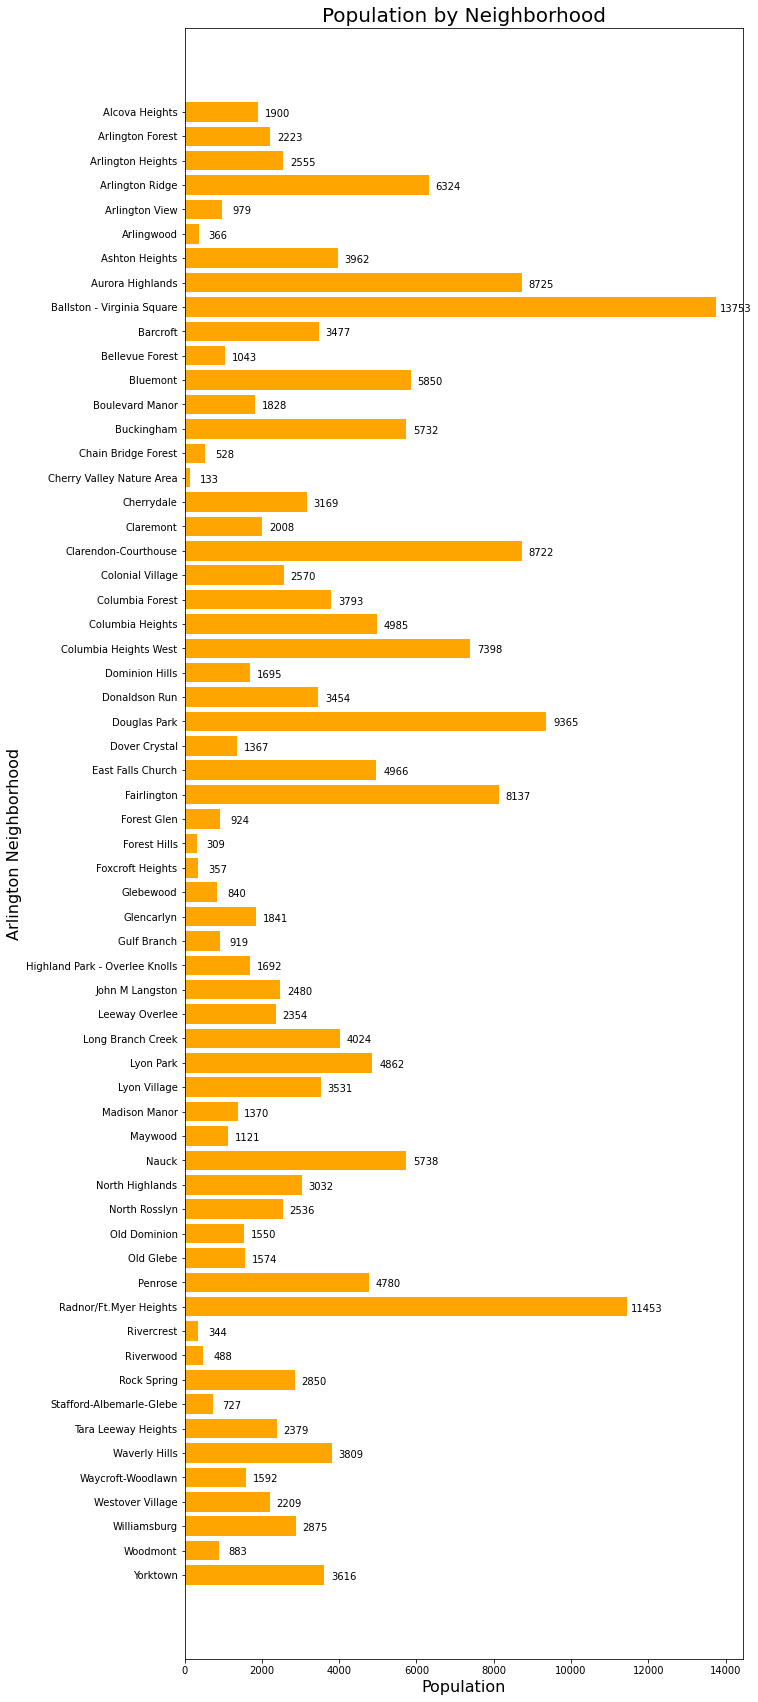

In [112]:
# Plot the population for each Neighborhood

x = list(arlington_demographics.index)
population = arlington_demographics['TOTAL POPULATION']

fig, ax = plt.subplots(figsize=(10,30))

rects = ax.barh(x, population, color='orange')

ax.invert_yaxis()
ax.set_title("Population by Neighborhood", fontsize=20)
ax.set_ylabel("Arlington Neighborhood", fontsize=16)
ax.set_xlabel("Population", fontsize=16)

for rect in rects:
    ax.annotate('{}'.format(round(rect.get_width(),2)),
                xy=(rect.get_width() + 500, rect.get_y() + rect.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.show()

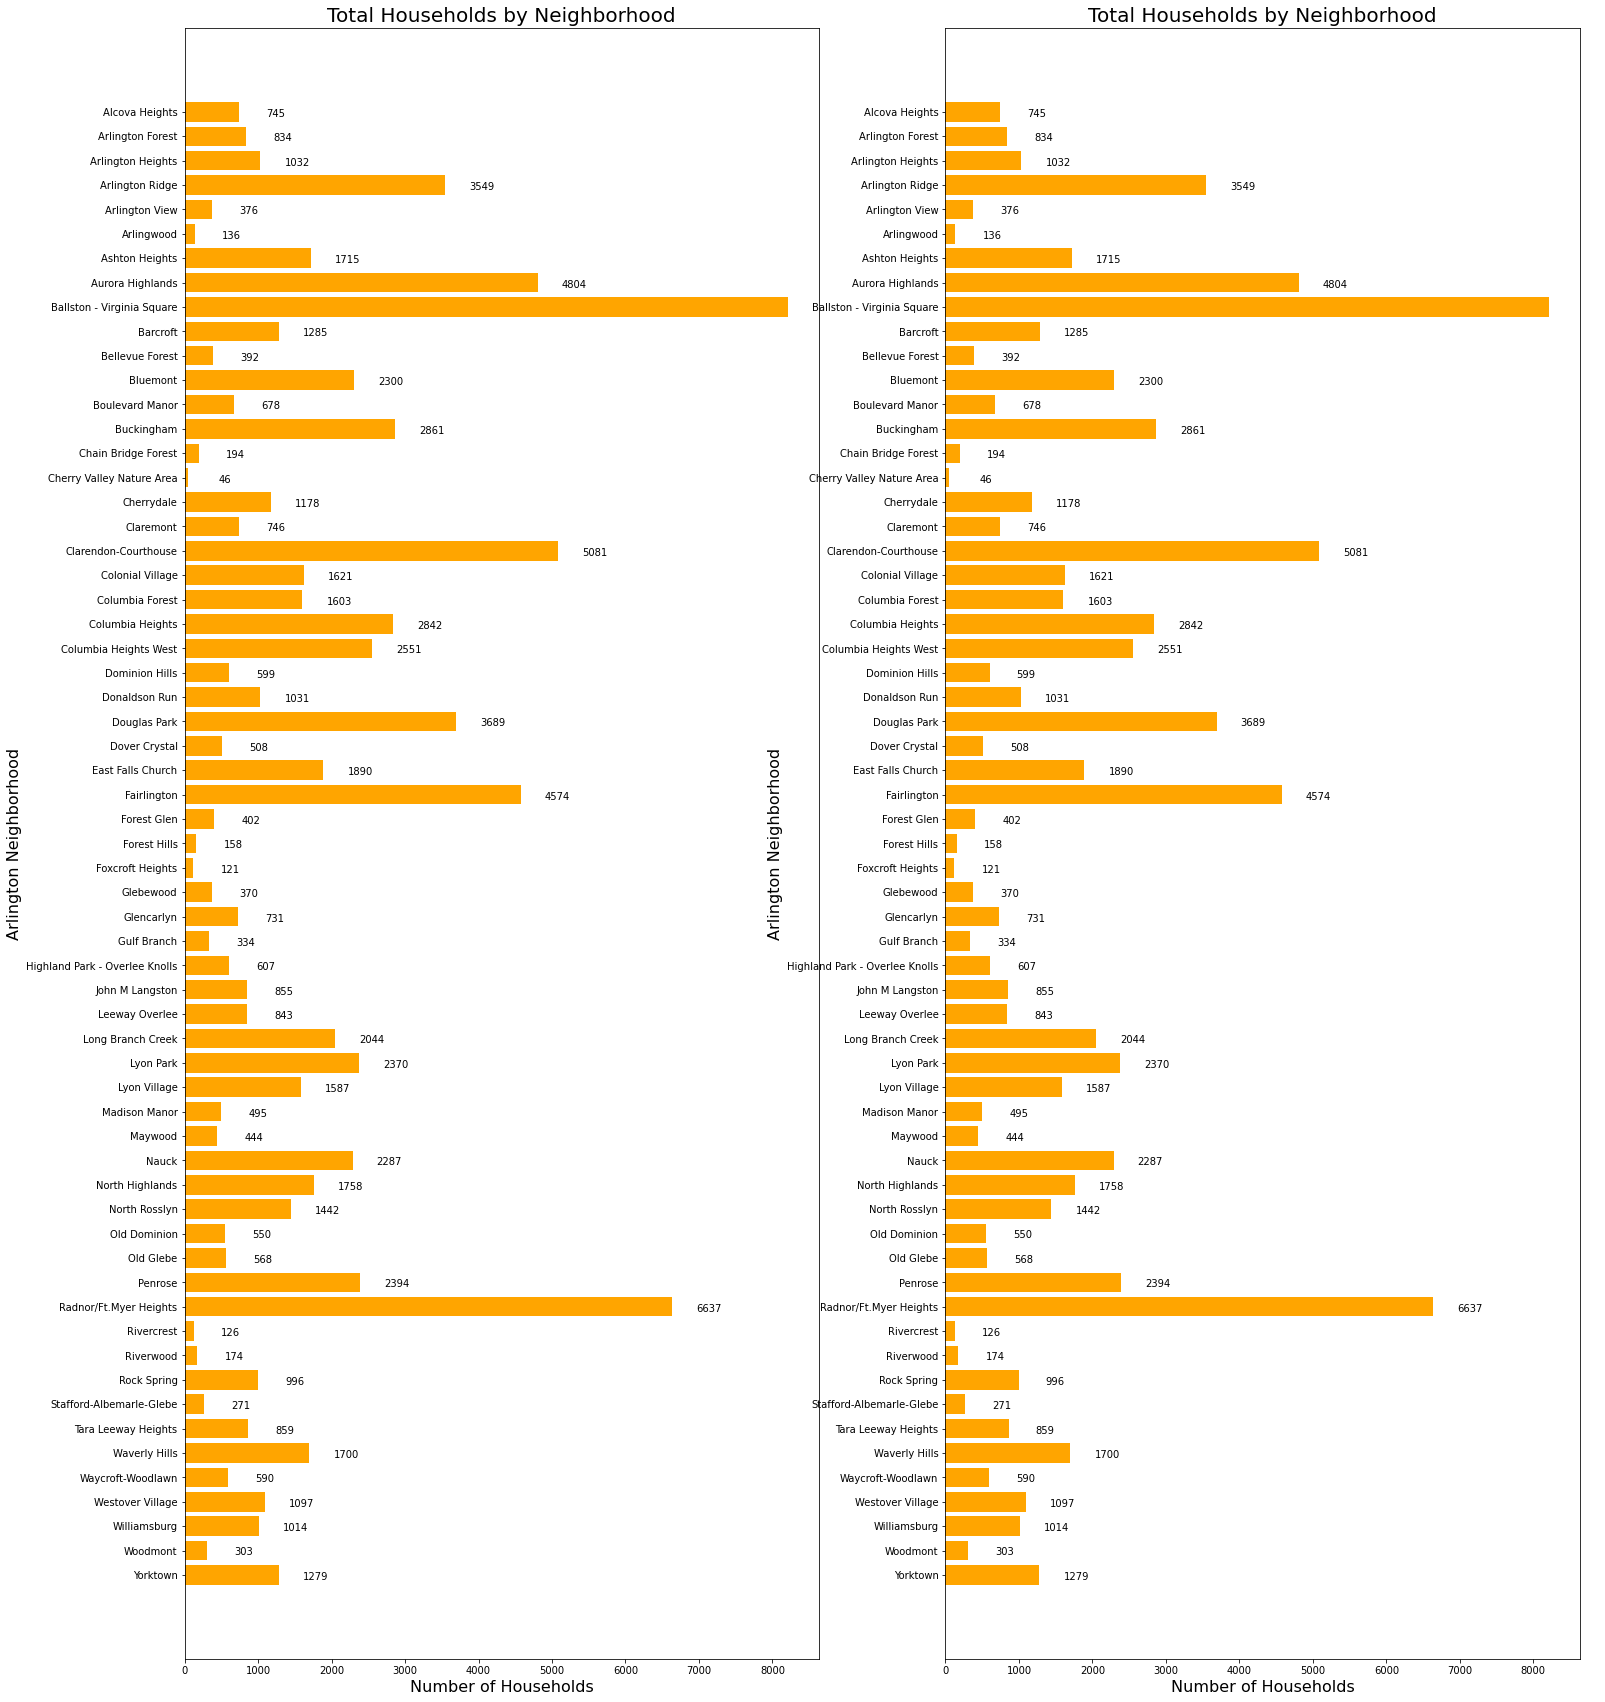

In [160]:
x = list(arlington_demographics.index)
population = arlington_demographics['TOTAL HOUSEHOLDS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,30))

rects = ax1.barh(x, population, color='orange')
rects = ax2.barh(x, population, color='orange')

ax1.invert_yaxis()
ax1.set_title("Total Households by Neighborhood", fontsize=20)
ax1.set_ylabel("Arlington Neighborhood", fontsize=16)
ax1.set_xlabel("Number of Households", fontsize=16)

for rect in rects:
    ax1.annotate('{}'.format(round(rect.get_width(),2)),
                xy=(rect.get_width() + 500, rect.get_y() + rect.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
ax2.invert_yaxis()
ax2.set_title("Total Households by Neighborhood", fontsize=20)
ax2.set_ylabel("Arlington Neighborhood", fontsize=16)
ax2.set_xlabel("Number of Households", fontsize=16)

for rect in rects:
    ax2.annotate('{}'.format(round(rect.get_width(),2)),
                xy=(rect.get_width() + 500, rect.get_y() + rect.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
plt.show()

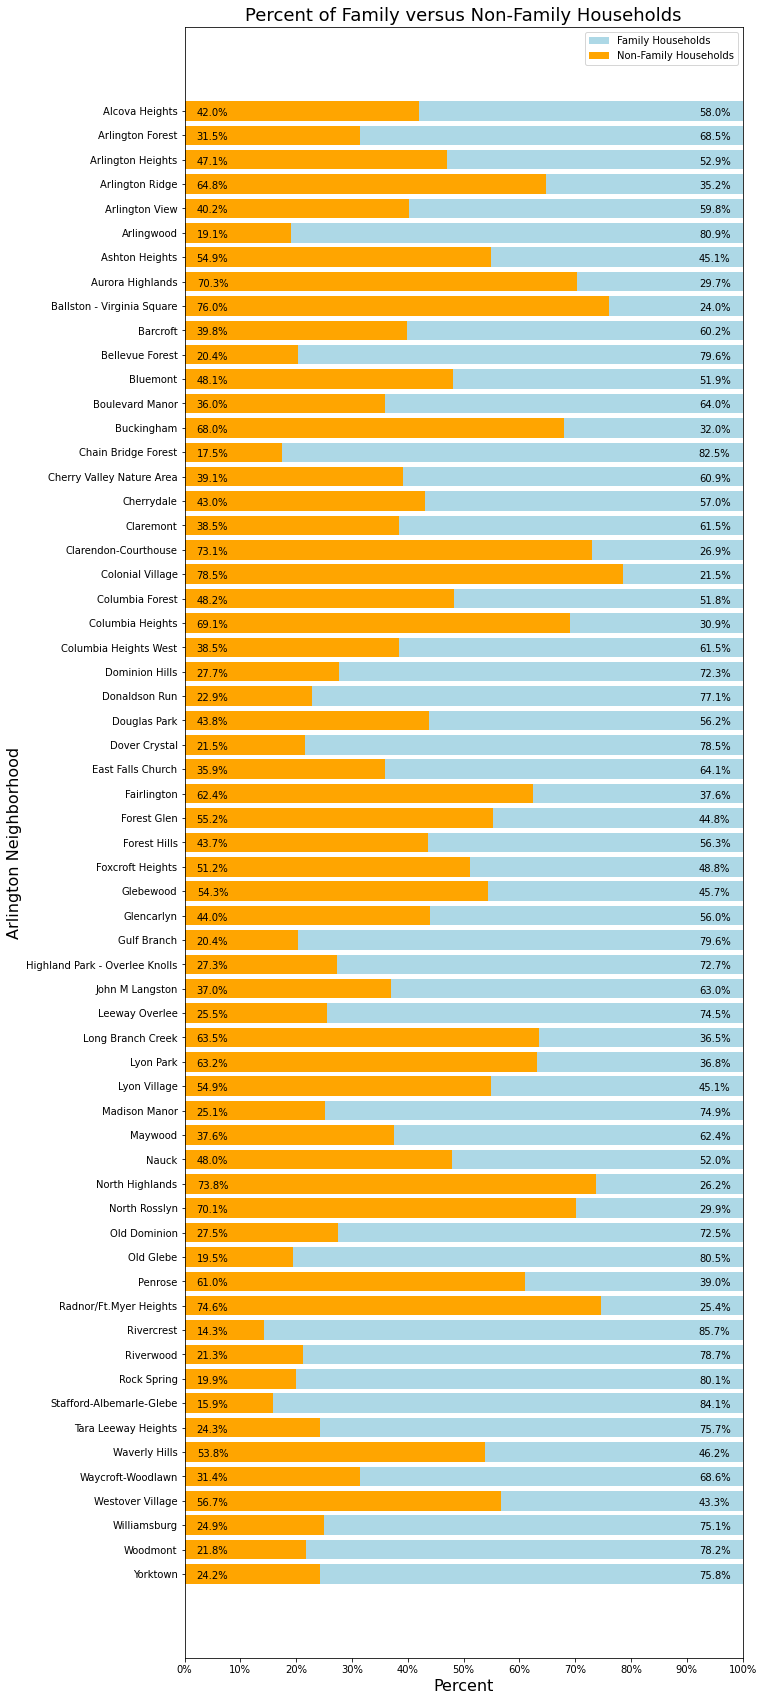

In [105]:
x = np.arange(0, 110, 10)
n = list(arlington_demographics.index)
family_households = arlington_demographics['family households'] * 100
nonfamily_households = arlington_demographics['nonfamily households'] * 100

fig, ax = plt.subplots(figsize=(10,30))
rects1 = ax.barh(n, family_households, label='Family Households', left=nonfamily_households, color='lightblue')
rects2 = ax.barh(n, nonfamily_households, label='Non-Family Households', color='orange')


ax.set_xticks(x)
ax.set_xticklabels([str(p)+'%' for p in x])
ax.set_title("Percent of Family versus Non-Family Households", fontsize=18)
ax.set_ylabel("Arlington Neighborhood", fontsize=16)
ax.set_xlabel("Percent", fontsize=16)
ax.invert_yaxis()
ax.set_xlim(0,100)
ax.legend()


for fam, non in zip(rects1, rects2):
    ax.annotate('{}%'.format(round(non.get_width(),2)),
                xy=(5, non.get_y() + non.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate('{}%'.format(round(fam.get_width(),2)),
                xy=(95, non.get_y() + non.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


plt.show()

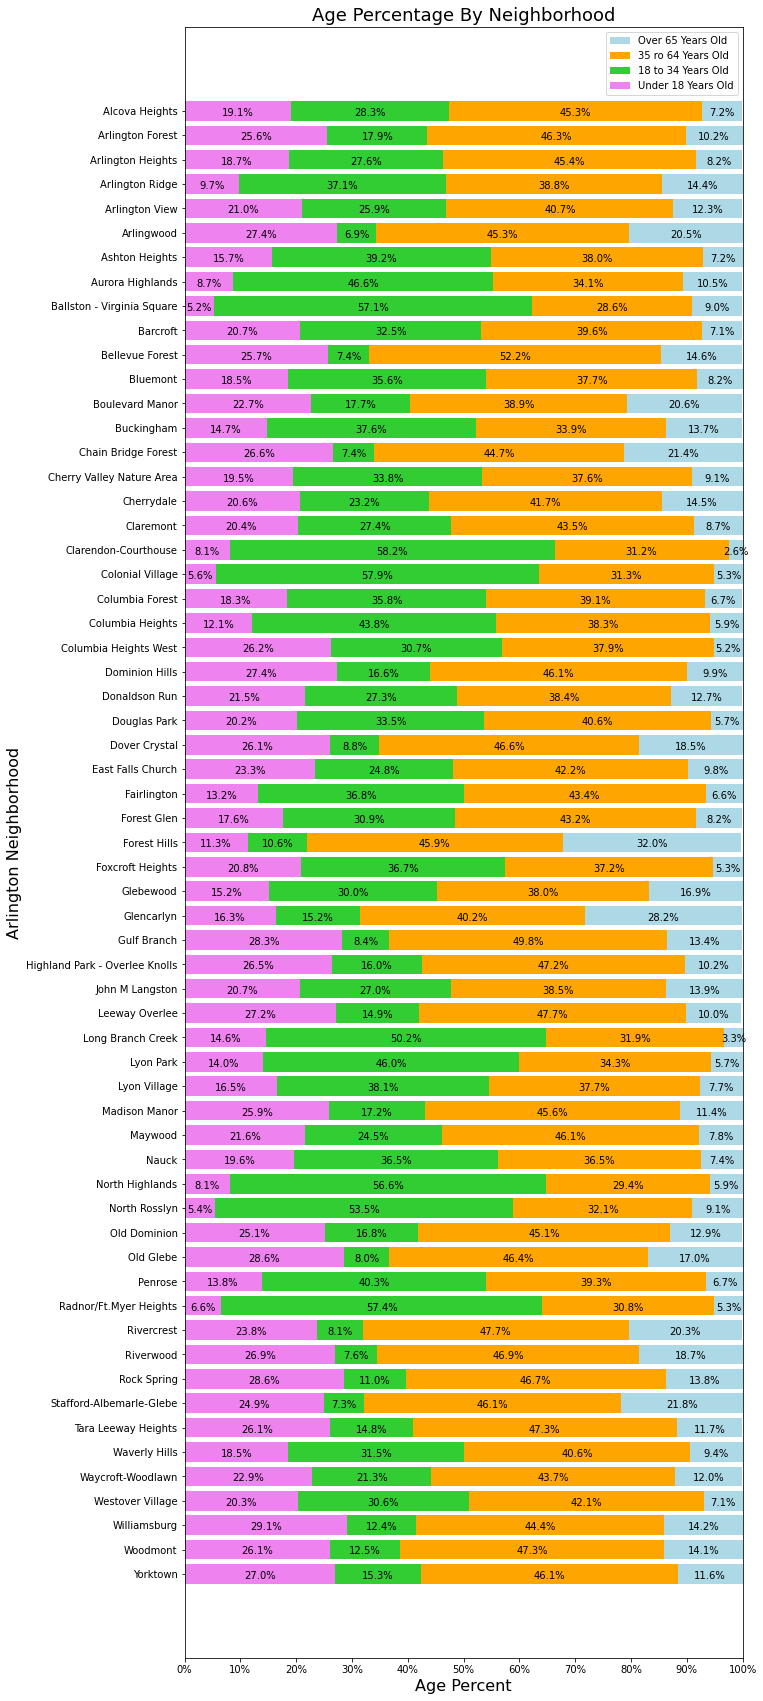

In [111]:
x = np.arange(0, 110, 10)
n = list(arlington_demographics.index)
under_18 = arlington_demographics['under 18 years old'] * 100
_18_to_34 = arlington_demographics['18 to 34 years old'] * 100
_35_to_64 = arlington_demographics['35 to 64 years old'] * 100
over_64 = arlington_demographics['over 64 years old'] * 100

fig, ax = plt.subplots(figsize=(10,30))
rects1 = ax.barh(n, over_64, label='Over 65 Years Old', left=under_18+_18_to_34+_35_to_64, color='lightblue')
rects2 = ax.barh(n, _35_to_64, label='35 ro 64 Years Old', left=under_18+_18_to_34, color='orange')
rects3 = ax.barh(n, _18_to_34, label='18 to 34 Years Old', left=under_18, color='limegreen')
rects4 = ax.barh(n, under_18, label='Under 18 Years Old', color='violet')


ax.set_xticks(x)
ax.set_xticklabels([str(p)+'%' for p in x])
ax.set_title("Age Percentage By Neighborhood", fontsize=18)
ax.set_ylabel("Arlington Neighborhood", fontsize=16)
ax.set_xlabel("Age Percent", fontsize=16)

ax.invert_yaxis()

ax.set_xlim(0,100)
ax.legend()


for bin1, bin2, bin3, bin4 in zip(rects1, rects2, rects3, rects4):
    ax.annotate('{}%'.format(round(bin1.get_width(),2)),
            xy=((bin1.get_width()/2)+bin4.get_width()+bin3.get_width()+bin2.get_width(), bin1.get_y()+bin3.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    ax.annotate('{}%'.format(round(bin2.get_width(),2)),
            xy=((bin2.get_width()/2)+bin4.get_width()+bin3.get_width(), bin2.get_y()+bin3.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    ax.annotate('{}%'.format(round(bin3.get_width(),2)),
            xy=((bin3.get_width()/2)+bin4.get_width(), bin3.get_y()+bin3.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')    
    
    ax.annotate('{}%'.format(round(bin4.get_width(),2)),
            xy=(bin4.get_width()/2, bin4.get_y()+bin4.get_height()),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

plt.show()